# HITANSH AGARWAL
### REGISTRATION NO.: 230957218
### ROLL NO.: 73

  checkin_acc  duration credit_history  amount savings_acc present_emp_since  \
0         A11         6            A34    1169         A65               A75   
1         A12        48            A32    5951         A61               A73   
2         A14        12            A34    2096         A61               A74   
3         A11        42            A32    7882         A61               A74   
4         A11        24            A33    4870         A61               A73   

   inst_rate personal_status  residing_since  age inst_plans  num_credits  \
0          4             A93               4   67       A143            2   
1          2             A92               2   22       A143            1   
2          2             A93               3   49       A143            1   
3          2             A93               4   45       A143            1   
4          3             A93               4   53       A143            2   

    job  status  
0  A173       0  
1  A173       1  
2 

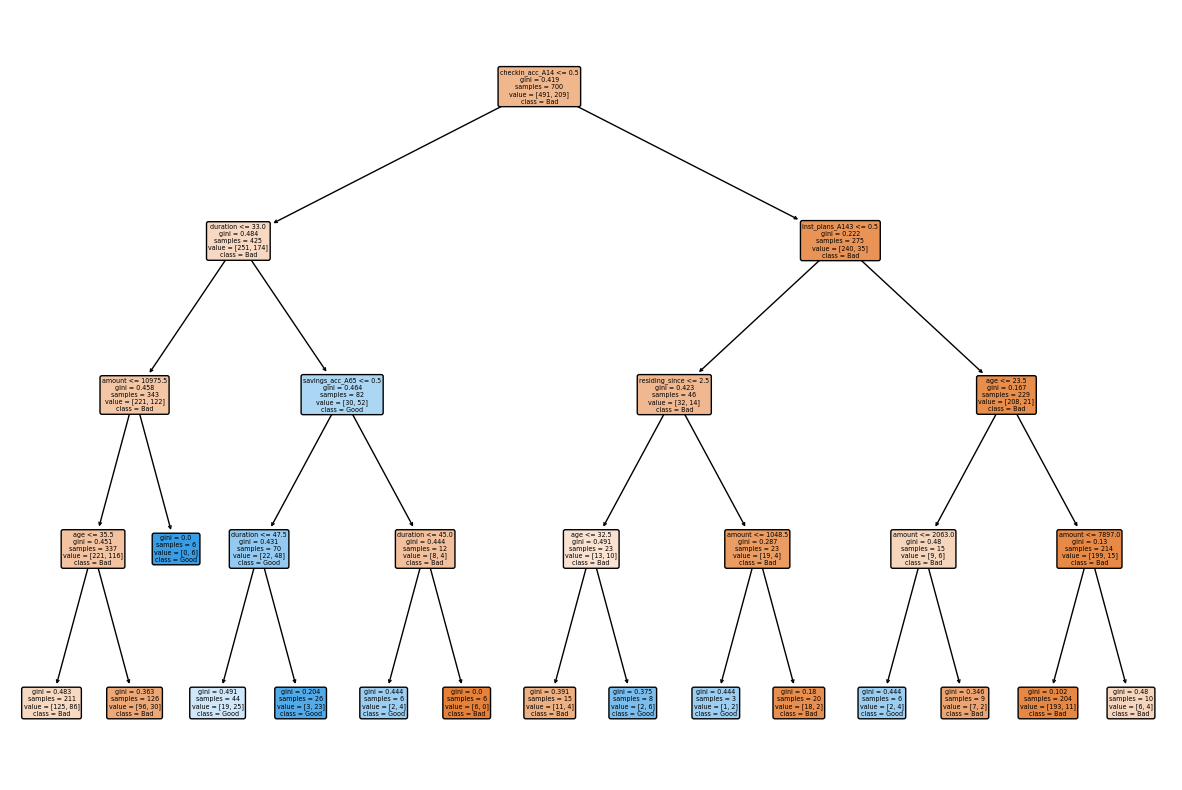

Best parameters: {'criterion': 'gini', 'max_depth': 4}
|--- checkin_acc_A14 <= 0.50
|   |--- duration <= 33.00
|   |   |--- amount <= 10975.50
|   |   |   |--- age <= 35.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  35.50
|   |   |   |   |--- class: 0
|   |   |--- amount >  10975.50
|   |   |   |--- class: 1
|   |--- duration >  33.00
|   |   |--- savings_acc_A65 <= 0.50
|   |   |   |--- duration <= 47.50
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  47.50
|   |   |   |   |--- class: 1
|   |   |--- savings_acc_A65 >  0.50
|   |   |   |--- duration <= 45.00
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  45.00
|   |   |   |   |--- class: 0
|--- checkin_acc_A14 >  0.50
|   |--- inst_plans_A143 <= 0.50
|   |   |--- residing_since <= 2.50
|   |   |   |--- age <= 32.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  32.50
|   |   |   |   |--- class: 1
|   |   |--- residing_since >  2.50
|   |   |   |--- amount <= 1048.50
|   |   |   |   |--- class: 1

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

data = pd.read_csv("German Credit Data.csv")

print(data.head())

X = data.drop(columns=['status']) 
y = data['status']  

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': list(range(2, 11))    
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Visualize the decision tree using matplotlib
plt.figure(figsize=(15,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Bad', 'Good'], rounded=True)
plt.show()

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

tree_rules = export_text(best_model, feature_names=list(X.columns))
print(tree_rules)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Best Accuracy: 0.9416666666666668


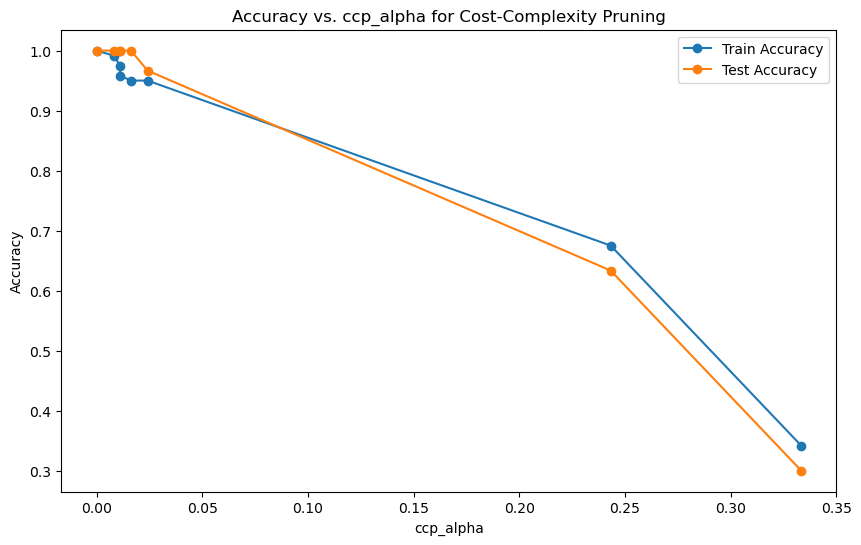

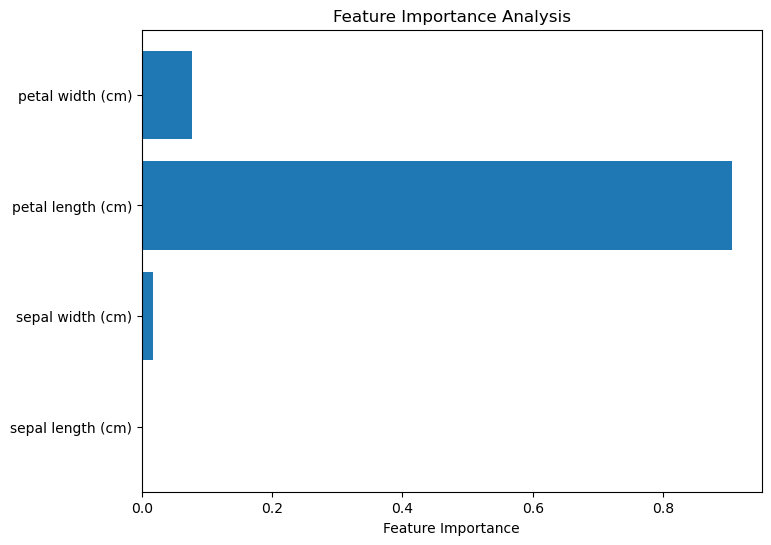

Least Important Feature: sepal length (cm)

Classification Report (after dropping least important feature):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix (after dropping least important feature):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


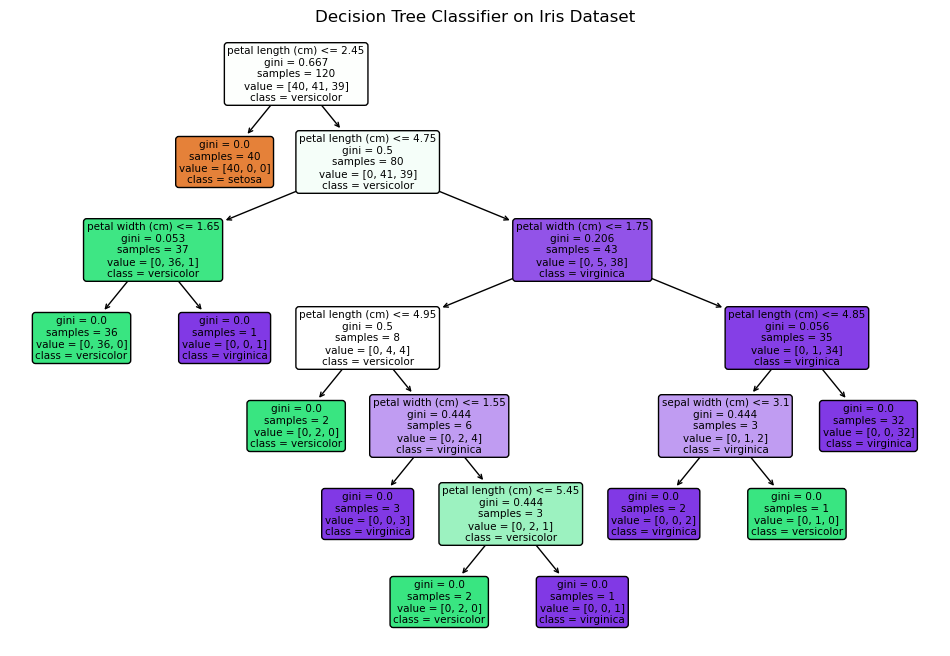

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Step 2: Print the Classification Report and Confusion Matrix
y_pred = dt.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 3: Hyperparameter Optimization using GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and corresponding accuracy
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# Step 4: Pruning the Decision Tree (Post-pruning using ccp_alpha)
# Get the effective alphas and the corresponding tree sizes
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create an empty list to store the accuracy scores
train_scores = []
test_scores = []

# Loop through the alphas and fit a model for each one
for ccp_alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt_pruned.fit(X_train, y_train)
    train_scores.append(dt_pruned.score(X_train, y_train))
    test_scores.append(dt_pruned.score(X_test, y_test))

# Plot Accuracy vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label='Train Accuracy', marker='o')
plt.plot(ccp_alphas, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha for Cost-Complexity Pruning')
plt.legend()
plt.show()

# Step 5: Feature Importance Analysis
# Extract feature importances from the trained model
feature_importances = dt.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Step 6: Drop the least important feature and retrain the model
# Identify the least important feature
least_important_feature = X.columns[np.argmin(feature_importances)]
print(f"Least Important Feature: {least_important_feature}")

# Drop the least important feature from the dataset
X_dropped = X.drop(columns=[least_important_feature])

# Split the new data into train and test sets
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y, test_size=0.2, random_state=42)

# Train the decision tree model again without the least important feature
dt_dropped = DecisionTreeClassifier(random_state=42)
dt_dropped.fit(X_train_dropped, y_train_dropped)

y_pred_dropped = dt_dropped.predict(X_test_dropped)
print("\nClassification Report (after dropping least important feature):\n", classification_report(y_test_dropped, y_pred_dropped))
print("Confusion Matrix (after dropping least important feature):\n", confusion_matrix(y_test_dropped, y_pred_dropped))
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Classifier on Iris Dataset")
plt.show()